In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# manually add a2e-mmc repos to PYTHONPATH if needed
import os, sys
module_path = os.path.join(os.environ['HOME'],'tools','a2e-mmc')
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from mmctools.plotting import plot_timehistory_at_height, plot_profile, plot_timeheight

# TTU tower measured TKE
written by Dries Allaerts <dries.allaerts@nrel.gov>

Analysis of turbulent kinetic energy (TKE) from `process_TTU_tower.ipynb`. Findings:
- The TKE measured at the two highest measurement stations of the TTU meteorological tower (158.2 and 200 m) are extremely high between about 0600 and 1200 UTC November 9 and seem unrealistic
- The high values are not related to a particular component of the Reynolds-stress tensor, i.e., all components are affected and show extremely high values at these heights for this period.
- Analysis of the 1-Hz signals of the velocity components clearly shows an unrealistic increase in turbulent fluctuations in all three velocity components at these heights for this period.

In [5]:
towerdata = 'data/TTU_tilt_corrected_20131108-09.csv'
towerdata_10min = 'data/TTU_tilt_corrected_20131108-09_10min.csv'

## read pre-processed data

In [6]:
df_10min = pd.read_csv(towerdata_10min,parse_dates=True,index_col=['datetime','height'])
df_10min.head()

RH        T          Ts           p       theta  \
datetime   height                                                        
2013-11-08 0.9     26.186  284.794  289.410000  908.547754  292.713920   
           2.4     25.810  284.932  290.979994  908.723508  292.839558   
           4.0     25.380  285.166  287.520000  908.215548  293.126923   
           10.1    25.264  285.298  287.250000  907.611414  293.318423   
           16.8    24.934  285.414  287.610000  907.307654  293.465778   

                       thetas         u         v         w      wspd  ...  \
datetime   height                                                      ...   
2013-11-08 0.9     297.458288 -0.138929  2.637817  0.074016  2.641473  ...   
           2.4     299.055399 -0.601111  2.783204  0.487330  2.847378  ...   
           4.0     295.546639  0.416792  4.043940  0.295800  4.065362  ...   
           10.1    295.325299 -0.276479  5.227110 -0.418065  5.234417  ...   
           16.8    295.723729  0.034364  5.908367 -0.173836  5.908467  ...   

                         vv        ww   uv   vw   uw   Tw  thetaw   u*  \
datetime   height                                                        
2013-11-08 0.9     0.015000  0.008343  0.0  0.0  0.0  0.0     0.0  0.0   
           2.4     0.165325  0.078520  0.0  0.0  0.0  0.0     0.0  0.0   
           4.0     0.269958  0.003119  0.0  0.0  0.0  0.0     0.0  0.0   
           10.1    0.027879  0.221537  0.0  0.0  0.0  0.0     0.0  0.0   
           16.8    0.054370  0.019302  0.0  0.0  0.0  0.0     0.0  0.0   

                        TKE        TI  
datetime   height                      
2013-11-08 0.9     0.012876  0.048324  
           2.4     0.289067  0.126433  
           4.0     0.141290  0.117591  
           10.1    0.127415  0.032939  
           16.8    0.041629  0.040432  

[5 rows x 22 columns]

In [7]:
df = pd.read_csv(towerdata,parse_dates=True,index_col=['datetime','height'])
df.head()

u         v         w          Ts        T      RH  \
datetime   height                                                              
2013-11-08 0.9    -0.138929  2.637817  0.074016  289.410000  284.794  26.186   
           2.4    -0.601111  2.783204  0.487330  290.979994  284.932  25.810   
           4.0     0.416792  4.043940  0.295800  287.520000  285.166  25.380   
           10.1   -0.276479  5.227110 -0.418065  287.250000  285.298  25.264   
           16.8    0.034364  5.908367 -0.173836  287.610000  285.414  24.934   

                            p  
datetime   height              
2013-11-08 0.9     908.547754  
           2.4     908.723508  
           4.0     908.215548  
           10.1    907.611414  
           16.8    907.307654

## Plot turbulent kinetic energy

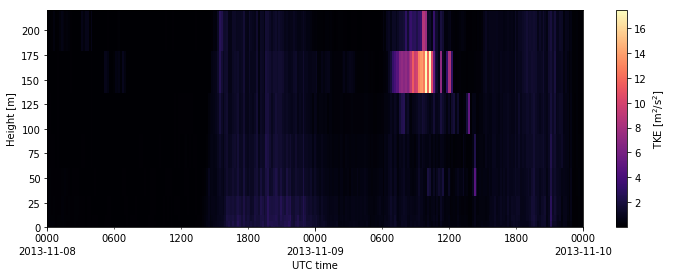

In [13]:
fig,ax,cbar = plot_timeheight(df_10min,fields='TKE',cmap='magma',
                             timelimits=('2013-11-08 00:00:00','2013-11-10 00:00:00'))

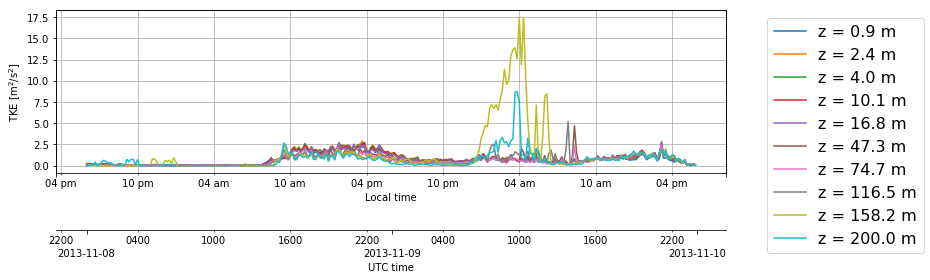

In [9]:
fig,ax,ax2 = plot_timehistory_at_height(df_10min,fields='TKE',heights='all',
                                    plot_local_time=True,local_time_offset=-6)

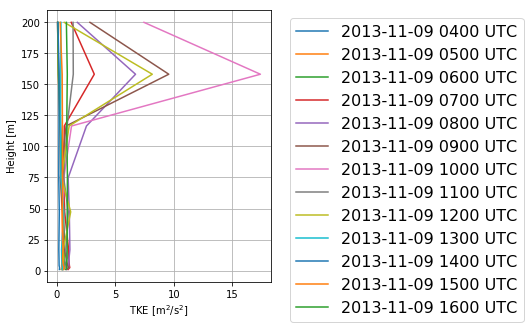

In [10]:
date_range = pd.date_range('2013-11-09 04:00:00','2013-11-09 16:00:00',freq='1h',name='datetime')
fig,ax = plot_profile(df_10min,fields='TKE',times=date_range)

## Plot individual Reynolds-stress components

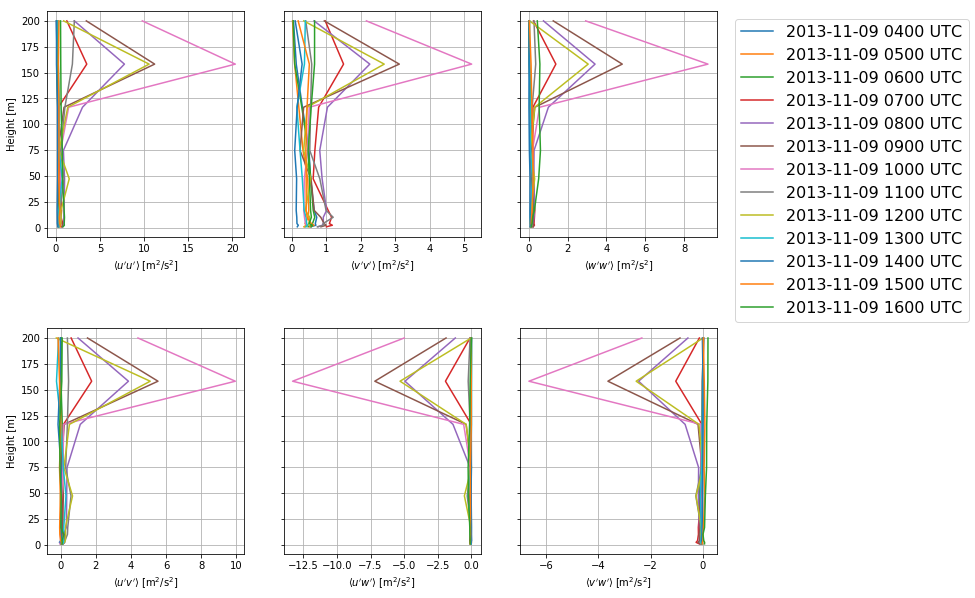

In [11]:
fig,ax = plot_profile(df_10min,fields=['uu','vv','ww','uv','uw','vw'],times=date_range,ncols=3)

## Plot 1-Hz data for velocity components

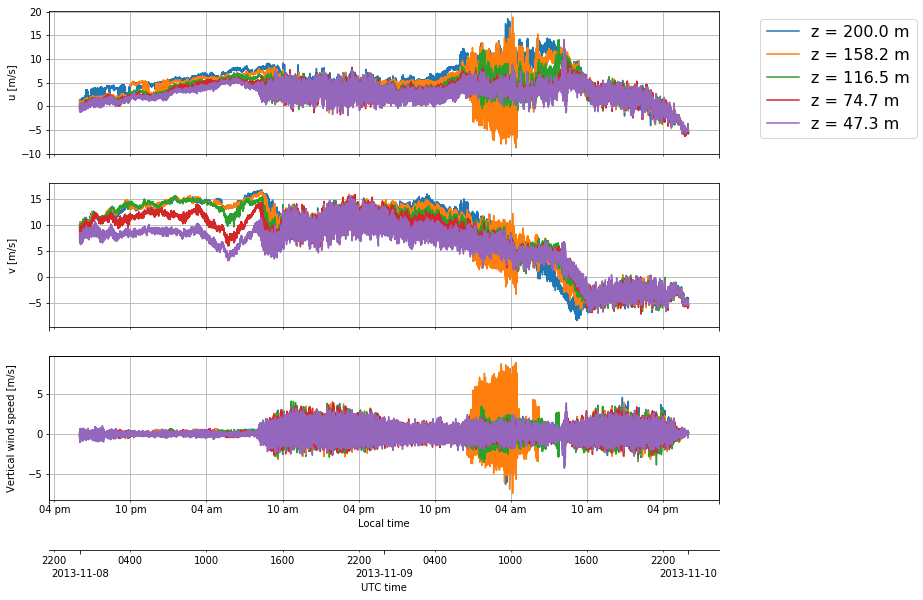

In [12]:
fig,ax,ax2 = plot_timehistory_at_height(df,fields=['u','v','w'],heights=df.index.levels[1][-1:-6:-1],
                                    plot_local_time=True,local_time_offset=-6)